In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = np.zeros((300, 300), dtype=np.uint8)
cv2.circle(image,(100,125), 60, 255, -1)
image[125:185, 100:160] = 255
cv2.ellipse(image,(160,185), (60,60), 0,0,90,255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("Original")
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("New")
    plt.show()


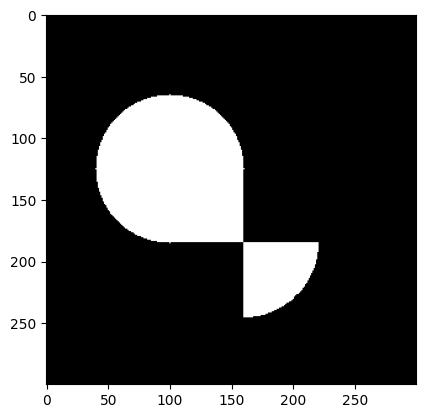

In [4]:
displayImage(image)

In [5]:
image1 = cv2.imread('./assets/concat1.jpg', 0)
image2 = cv2.imread('./assets/concat2.jpg', 0)
image3 = cv2.imread('./assets/concat3.jpg', 0)
cv2.imshow('image1',image1)
cv2.imshow('image2',image2)
cv2.imshow('image3',image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

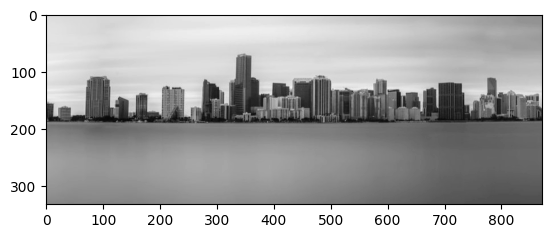

In [6]:
concatenation=cv2.hconcat([image1, image2, image3])
displayImage(concatenation)

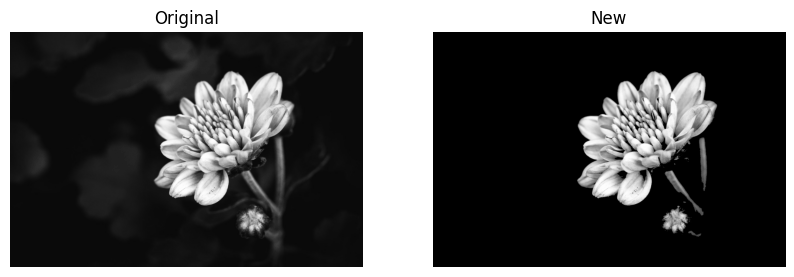

In [7]:
threshold1 = cv2.imread('./assets/threshold.jpg', 0)
threshold_to_zero=threshold1.copy()
threshold_to_zero[threshold_to_zero<70]=0
displayImages(threshold1, threshold_to_zero)

In [8]:
point1 = None
point2 = None
segment = None

def BorderFunction(event,x,y,flags,param):
    global point1, point2, segment
    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x,y)
            print(f"Point 1: {point1}")
            
        elif point2 is None:
            point2 = (x,y)
            print(f"Point 2: {point2}")
        
        if point2 is not None:
            cv2.rectangle(towers, point1, point2, (0, 0, 255), 5)
            
  
        
# Creating a window to add the mouse callback to
towers = cv2.imread('./assets/skyline.jpg', 0)
towers = cv2.cvtColor(towers, cv2.COLOR_GRAY2BGR)

cv2.namedWindow('Tower')
cv2.setMouseCallback('Tower',BorderFunction)

while(1):
    cv2.imshow('Tower',towers)
    if segment is not None:
        cv2.imshow('Segment', segment)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()

Point 1: (369, 89)
Point 2: (734, 431)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


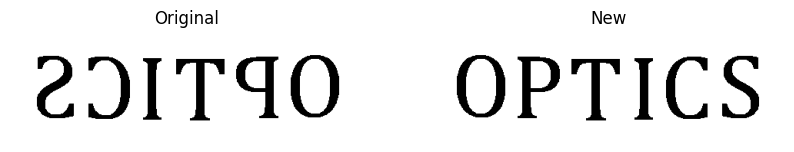

In [9]:
mirror_before = cv2.imread('./assets/mirror.jpeg', 0)
mirror_after=mirror_before.copy()
print(mirror_before)
num_rows, num_columns = mirror_before.shape
for i in range(num_rows):
    for j in range(num_columns // 2): 
        mirror_after[i, j], mirror_after[i, num_columns - 1 - j] = mirror_after[i, num_columns - 1 - j], mirror_after[i, j]

displayImages(mirror_before,mirror_after)


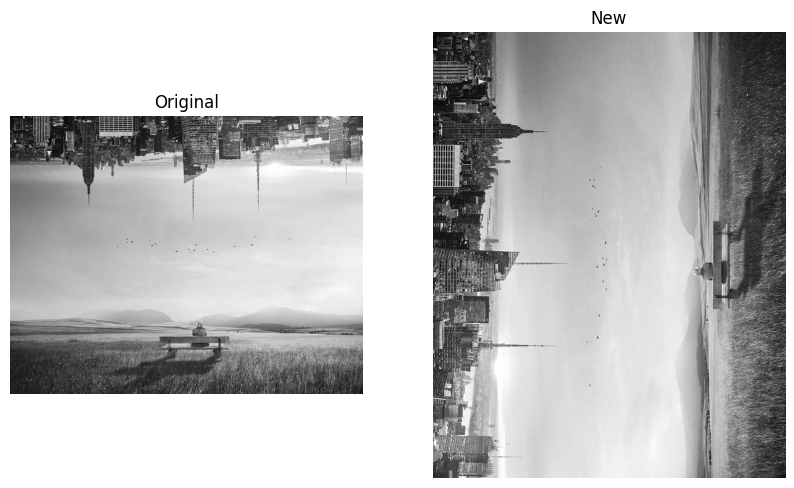

In [13]:
rotate_before = cv2.imread('./assets/rotate.jpeg', 0)
num_rows, num_columns = rotate_before.shape
rotate_after = np.zeros((num_columns, num_rows), dtype=np.uint8)
for i in range(num_rows):
     for j in range(num_columns): 
        rotate_after[j, i] = rotate_before[i, j]


        
displayImages(rotate_before,rotate_after)